# Assignment 3 (10.24) 

In [13]:
import torch 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from fastai.vision.all import *

In [2]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');

In [3]:
#hide
graphviz.set_jupyter_format('png')

'svg'

## `1`. 크롤링을 통한 이미지 분석 및 CAM 

`(1)` 두 가지 키워드로 크롤링을 수행하여 이미지자료를 모아라. (키워드는 각자 마음에 드는 것으로 설정할 것) 

In [8]:
#
#!pip install -Uqq duckduckgo_search
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

***힌트1: `hynn`, `iu` 라는 키워드로 크롤링하여 이미지자료를 모으는 코드***

In [10]:
# 
# 폴더만드는코드 -- 사실 손으로 만들어도 무방함.. 
!mkdir images
!mkdir images/train
!mkdir images/test 
!mkdir images/train/iu
!mkdir images/train/hynn
!mkdir images/test/iu
!mkdir images/test/hynn

In [11]:
download_images(dest='./images/train/iu',urls=search_images('iu',max_images=200)) # iu 라는 키워드로 200개 이미지 크롤링 -> ./images/train/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/hynn',urls=search_images('hynn',max_images=200)) # hynn 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/hynn 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/iu',urls=search_images('iu kpop',max_images=200))  # iu kpop 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/train/hynn',urls=search_images('hynn kpop',max_images=200)) # hynn kpop 이라는 키워드로 200개 이미지 크롤링 -> ./images/train/hynn 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 

In [12]:
download_images(dest='./images/test/iu',urls=search_images('iu photo',max_images=50)) # iu photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/iu 에 저장
time.sleep(10) # 서버과부하를 위한 휴식코드 
download_images(dest='./images/test/hynn',urls=search_images('hynn photo',max_images=50)) # hynn photo 라는 키워드로 50개 이미지 크롤링 -> ./images/test/hynn 에 저장 
time.sleep(10) # 서버과부하를 위한 휴식코드 

***힌트2: 불량이미지 삭제***

In [14]:
bad_images = verify_images(get_image_files('./images'))
bad_images

(#11) [Path('images/train/iu/9e31eee7-5064-498b-a29f-78c2e2cd9636.jpg'),Path('images/train/iu/ddfc8fd0-d02d-417c-bab7-ee90013edbad.jpg'),Path('images/train/iu/9bc45680-5c93-47c4-ad92-04422185bca0.jpg'),Path('images/train/hynn/84bbfdac-6523-45c5-9305-158793a944bc.png'),Path('images/train/hynn/e996cb54-04ea-454d-bf25-e4193984f507.jpg'),Path('images/train/hynn/5d9adb29-7754-4ce9-9805-6814f3805666.png'),Path('images/train/hynn/5ce99ce3-1711-4a3a-9872-b3fb6719462f.jpg'),Path('images/train/hynn/f08c304c-6085-44e1-9f14-c97c2770e076.jpg'),Path('images/train/hynn/e73defd2-059d-469e-884c-8368a5f72208.jpg'),Path('images/test/iu/c8e94079-ce55-47e5-bcd6-fcfe1dc33388.jpg')...]

- 불량이미지 목록 

In [15]:
bad_images.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None...]

- 불량이미지는 dls를 불러올때 방해되므로 제거 

`(2)` ImageDataLoaders.from_folder 를 이용하여 dls를 만들어라. 

***힌트1: dls를 만드는 코드***

In [16]:
dls = ImageDataLoaders.from_folder(path = './images', train='train',valid='valid',item_tfms=Resize(512)) 

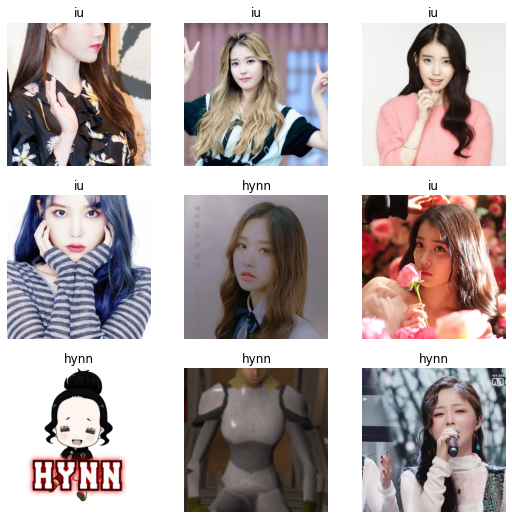

In [17]:
dls.show_batch()

`(3)` resnet34를 이용하여 학습하라. 

`(4)` CAM (class activation mapping)을 이용하여 (3)의 모형의 판단근거를 시각화하라. 

## `2`. 다음을 읽고 참거짓을 판단하여라. 

`(1)` 아래의 레이어에 의하여 수행되는 변환은 선형변환이다. 

```python
torch.nn.Conv2d(3,16,(5,5))
```